In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Norm, Stan, Robust, log

In [2]:
df = pd.read_csv('D:/PycharmProjects/pythonProject/train_test_combine_wo_lag.csv',header = 0)
features = ['Ammonia Nitrogen','NOx','Dissolved Oxygen','pH','Water Temperature','Turbidity','Total Phosphorus','Air Temperature','Specific Humidity','Wind Speed','Precipitation','Shortwave radiation flux','Developed Percent']
x = df.drop(columns=['Agricultural Percent','Chl_current'])
y = df["Chl_current"]

In [3]:
x.head()

,Ammonia Nitrogen,NOx,Dissolved Oxygen,pH,Water Temperature,Turbidity,Total Phosphorus,Air Temperature,Specific Humidity,Wind Speed,Precipitation,Shortwave Radiation Flux,Developed Percent
0,0.120000,0.010000,6.920000,7.94,24.120000,0.500000,0.004000,20.610000,0.012005,1.269212,80.1024,170.950,0.950742
1,0.082718,0.070539,7.040000,8.03,21.970000,0.901990,0.007586,22.730000,0.013627,2.976928,56.9728,210.145,0.950742
2,0.060000,0.020000,6.633333,8.04,26.016667,0.500000,0.006000,24.400000,0.014794,2.124735,69.8112,248.080,0.950742
3,0.080370,0.070048,6.820000,7.99,24.906667,1.019418,0.007491,24.030039,0.013869,1.518190,136.8320,244.566,0.950742
4,0.110000,0.030000,5.820000,8.00,27.086667,1.000000,0.007000,26.550000,0.016619,2.083387,104.5632,272.162,0.950742


In [4]:
features = list(x.columns)
features

['Ammonia Nitrogen',
 'NOx',
 'Dissolved Oxygen',
 'pH',
 'Water Temperature',
 'Turbidity',
 'Total Phosphorus',
 'Air Temperature',
 'Specific Humidity',
 'Wind Speed',
 'Precipitation',
 'Shortwave Radiation Flux',
 'Developed Percent']

In [5]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler()
# transform data
x_norm = norm.fit_transform(x)

In [6]:
x_norm = pd.DataFrame(x_norm, columns = features)

In [7]:
x_norm.describe()

,Ammonia Nitrogen,NOx,Dissolved Oxygen,pH,Water Temperature,Turbidity,Total Phosphorus,Air Temperature,Specific Humidity,Wind Speed,Precipitation,Shortwave Radiation Flux,Developed Percent
count,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000
mean,0.235703,0.026262,0.290602,0.624921,0.650213,0.025829,0.031986,0.667563,0.601151,0.349778,0.261524,0.531637,0.699141
std,0.130509,0.065576,0.068058,0.083805,0.179410,0.037839,0.069737,0.221799,0.217944,0.154471,0.207426,0.256537,0.329068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.161751,0.005076,0.254724,0.581427,0.518175,0.009063,0.011834,0.489877,0.423938,0.237768,0.090729,0.295139,0.630299
50%,0.223844,0.005076,0.295078,0.630888,0.664932,0.016608,0.023361,0.689805,0.623056,0.334226,0.207020,0.564067,0.698453
75%,0.285936,0.015976,0.331693,0.676985,0.801801,0.028061,0.035503,0.882140,0.805098,0.454000,0.397682,0.762688,0.992336
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# data standardization with sklearn
from sklearn.preprocessing import StandardScaler
stan = StandardScaler()
# transform data
x_stan = stan.fit_transform(x)

In [9]:
x_stan = pd.DataFrame(x_stan, columns = features)

In [10]:
x_stan.describe()

,Ammonia Nitrogen,NOx,Dissolved Oxygen,pH,Water Temperature,Turbidity,Total Phosphorus,Air Temperature,Specific Humidity,Wind Speed,Precipitation,Shortwave Radiation Flux,Developed Percent
count,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03
mean,2.914657e-16,3.580598e-16,3.809967e-17,5.075287e-15,-2.582811e-17,-1.836317e-17,-3.082347e-17,-4.998574e-17,-5.859510e-17,-7.452886e-18,-1.728620e-16,-9.926473e-17,9.091236e-16
std,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00
min,-1.806287e+00,-4.005358e-01,-4.270529e+00,-7.457911e+00,-3.624701e+00,-6.826967e-01,-4.587399e-01,-3.010198e+00,-2.758680e+00,-2.264686e+00,-1.260990e+00,-2.072657e+00,-2.124919e+00
25%,-5.667263e-01,-3.231165e-01,-5.272379e-01,-5.190680e-01,-7.360662e-01,-4.431352e-01,-2.890148e-01,-8.012274e-01,-8.132296e-01,-7.252240e-01,-8.235230e-01,-9.220188e-01,-2.092313e-01
50%,-9.088734e-02,-3.231165e-01,6.577268e-02,7.121553e-02,8.205287e-02,-2.437169e-01,-1.237075e-01,1.002934e-01,1.005220e-01,-1.006905e-01,-2.628031e-01,1.264308e-01,-2.088320e-03
75%,3.849516e-01,-1.568726e-01,6.038504e-01,6.213437e-01,8.450505e-01,5.898925e-02,5.043530e-02,9.675792e-01,9.359095e-01,6.748029e-01,6.565130e-01,9.007828e-01,8.911173e-01
max,5.857100e+00,1.485106e+01,1.042493e+01,4.476257e+00,1.949935e+00,2.574892e+01,1.388303e+01,1.499036e+00,1.830315e+00,4.209961e+00,3.560707e+00,1.825975e+00,9.144109e-01


In [11]:
from sklearn.preprocessing import RobustScaler
robu = RobustScaler()
# transform data
x_robu = robu.fit_transform(x)

In [12]:
x_robu = pd.DataFrame(x_robu, columns = features)

In [13]:
x_robu.describe()

,Ammonia Nitrogen,NOx,Dissolved Oxygen,pH,Water Temperature,Turbidity,Total Phosphorus,Air Temperature,Specific Humidity,Wind Speed,Precipitation,Shortwave Radiation Flux,Developed Percent
count,3456.000000,3456.000000,3456.000000,3.456000e+03,3.456000e+03,3456.000000,3.456000e+03,3456.000000,3.456000e+03,3456.000000,3456.000000,3.456000e+03,3456.000000
mean,0.095502,1.943630,-0.058150,-6.244721e-02,-5.189551e-02,0.485372,3.644351e-01,-0.056701,-5.746940e-02,0.071920,0.177565,-6.936071e-02,0.001898
std,1.050928,6.016130,0.884232,8.770032e-01,6.325559e-01,1.991826,2.946367e+00,0.565435,5.717926e-01,0.714375,0.675757,5.486854e-01,0.908934
min,-1.802500,-0.465697,-3.833743,-6.602113e+00,-2.344390e+00,-0.874245,-9.869855e-01,-1.758525,-1.634634e+00,-1.545682,-0.674434,-1.206433e+00,-1.929234
25%,-0.500000,0.000000,-0.524283,-5.176056e-01,-5.174312e-01,-0.397149,-4.869855e-01,-0.509677,-5.224007e-01,-0.446087,-0.378856,-5.751858e-01,-0.188252
50%,0.000000,0.000000,0.000000,3.752857e-15,3.008661e-16,0.000000,-1.084202e-16,0.000000,3.929691e-16,0.000000,0.000000,1.402416e-16,0.000000
75%,0.500000,1.000000,0.475717,4.823944e-01,4.825688e-01,0.602851,5.130145e-01,0.490323,4.775993e-01,0.553913,0.621144,4.248142e-01,0.811748
max,6.250000,91.276628,9.158572,3.862676e+00,1.181369e+00,51.765321,4.126301e+01,0.790783,9.889398e-01,3.078978,2.583390,9.323801e-01,0.832917


In [14]:
# extract data from csv
# train_data = pd.read_csv('D:/PycharmProjects/pythonProject/train_data_w_lag.csv',header = 0)
# test_data = pd.read_csv('D:/PycharmProjects/pythonProject/test_data_w_lag.csv',header = 0)

In [15]:
# train data are from 1997 to 2015, test data are from 2016 to 2020
# train 79% test 21%

# original data without transforming
Xtrain = x[:2736]
Ytrain = y[:2736]
Xtest = x.tail(720)
Ytest = y.tail(720)

'''
Xtrain = train_data.drop(columns=['Agricultural Percent','Chl_1m_lag'])
Xtest = test_data.drop(columns=['Agricultural Percent','Chl_1m_lag'])
Ytrain = train_data["Chl_1m_lag"]
Ytest = test_data["Chl_1m_lag"]
'''

'\nXtrain = train_data.drop(columns=[\'Agricultural Percent\',\'Chl_1m_lag\'])\nXtest = test_data.drop(columns=[\'Agricultural Percent\',\'Chl_1m_lag\'])\nYtrain = train_data["Chl_1m_lag"]\nYtest = test_data["Chl_1m_lag"]\n'

In [16]:
Xtrain = x[:2736]
Ytrain = y[:2736]
Xtest = x.tail(720)
Ytest = y.tail(720)

In [17]:
# Grid search
# Origin data
best_score = 0
for gamma in [0.000001,0.00001,0.0001,0.001,0.01,0.1,1]:
    for C in [0.001,0.01,0.1,1,10,100,1000,10000]:
        for epsilon in [0.001,0.01,0.1,1,10,100]:
            
            SV_R = SVR(gamma = gamma, C = C, epsilon = epsilon)

            SV_R.fit(Xtrain,Ytrain)
            score = SV_R.score(Xtest,Ytest)
            if score > best_score:
                best_score = score
                best_parameters = {'gamma':gamma,'C':C,'epsilon':epsilon}


print("Best score:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

# Origin data

Best score:0.18
Best parameters:{'gamma': 1e-05, 'C': 10000, 'epsilon': 1}


In [18]:
Xtrain = x_norm[:2736]
Ytrain = y[:2736]
Xtest = x_norm.tail(720)
Ytest = y.tail(720)

In [19]:
# Grid search
# norm data
best_score = 0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        for epsilon in [0.0001,0.001,0.01,0.1,1,10]:
            
            SV_R = SVR(gamma = gamma, C = C, epsilon = epsilon)

            SV_R.fit(Xtrain,Ytrain)
            score = SV_R.score(Xtest,Ytest)
            if score > best_score:
                best_score = score
                best_parameters = {'gamma':gamma,'C':C,'epsilon':epsilon}


print("Best score:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

# norm data

Best score:0.32
Best parameters:{'gamma': 1, 'C': 10, 'epsilon': 0.1}


In [20]:
Xtrain = x_stan[:2736]
Ytrain = y[:2736]
Xtest = x_stan.tail(720)
Ytest = y.tail(720)

In [21]:
# Grid search
# stan data
best_score = 0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100,1000]:
        for epsilon in [0.0001,0.001,0.01,0.1,1,10]:
            
            SV_R = SVR(gamma = gamma, C = C, epsilon = epsilon)

            SV_R.fit(Xtrain,Ytrain)
            score = SV_R.score(Xtest,Ytest)
            if score > best_score:
                best_score = score
                best_parameters = {'gamma':gamma,'C':C,'epsilon':epsilon}


print("Best score:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

# stan data

Best score:0.36
Best parameters:{'gamma': 0.01, 'C': 100, 'epsilon': 0.1}


In [22]:
Xtrain = x_robu[:2736]
Ytrain = y[:2736]
Xtest = x_robu.tail(720)
Ytest = y.tail(720)

In [23]:
# Grid search
# robu data
best_score = 0
for gamma in [0.0001,0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100,1000,10000]:
        for epsilon in [0.0001,0.001,0.01,0.1,1,10]:
            
            SV_R = SVR(gamma = gamma, C = C, epsilon = epsilon)

            SV_R.fit(Xtrain,Ytrain)
            score = SV_R.score(Xtest,Ytest)
            if score > best_score:
                best_score = score
                best_parameters = {'gamma':gamma,'C':C,'epsilon':epsilon}


print("Best score:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

# robu data

Best score:0.36
Best parameters:{'gamma': 0.001, 'C': 1000, 'epsilon': 0.1}


In [24]:
Xtrain = np.log(x)[:2736]
Ytrain = y[:2736]
Xtest = np.log(x).tail(720)
Ytest = y.tail(720)

In [25]:
# Grid search
# log data
best_score = 0
for gamma in [0.0001,0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100,1000,10000]:
        for epsilon in [0.0001,0.001,0.01,0.1,1,10]:
            
            SV_R = SVR(gamma = gamma, C = C, epsilon = epsilon)

            SV_R.fit(Xtrain,Ytrain)
            score = SV_R.score(Xtest,Ytest)
            if score > best_score:
                best_score = score
                best_parameters = {'gamma':gamma,'C':C,'epsilon':epsilon}


print("Best score:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

# log data

Best score:0.37
Best parameters:{'gamma': 0.01, 'C': 1000, 'epsilon': 0.001}


Data transformation in SVR shows that the results of log is the best, followed with robu=stan>norm>original

In [26]:
Xtrain = np.log(x)[:2736]
Ytrain = y[:2736]
Xtest = np.log(x).tail(720)
Ytest = y.tail(720)

In [27]:
# SVR

# 1.Model
SV_R = SVR(gamma=0.01, C=1000, epsilon=0.001)

# 2.Train
SV_R.fit(Xtrain,Ytrain)

# 3.Scores
y_predict_xtrain = SV_R.predict(Xtrain)
y_predict_xtest = SV_R.predict(Xtest)

score_train = metrics.r2_score(Ytrain, y_predict_xtrain)
score_test = metrics.r2_score(Ytest, y_predict_xtest)
MAE_train = metrics.mean_absolute_error(Ytrain, y_predict_xtrain)
MAE_test = metrics.mean_absolute_error(Ytest, y_predict_xtest)
MSE_train = metrics.mean_squared_error(Ytrain, y_predict_xtrain)
MSE_test = metrics.mean_squared_error(Ytest, y_predict_xtest)
MAPE_train = metrics.mean_absolute_percentage_error(Ytrain, y_predict_xtrain)
MAPE_test = metrics.mean_absolute_percentage_error(Ytest, y_predict_xtest)

print('R2 for train:', score_train)
print('R2 for test:', score_test)
print('MAE for train:', MAE_train)
print('MAE for test:', MAE_test)
print('MSE for train:', MSE_train)
print('MSE for test:', MSE_test)
print('MAPE for train', MAPE_train)
print('MAPE for test', MAPE_test)

R2 for train: 0.40707975073475455
R2 for test: 0.37033715310878257
MAE for train: 0.6411256246772262
MAE for test: 0.7773005040286295
MSE for train: 1.7705653641952648
MSE for test: 1.7764544786050642
MAPE for train 0.64443007752534
MAPE for test 0.6595541916062189


In [28]:
# same as MAPE
PercentBias_train = np.mean(np.abs((Ytrain - y_predict_xtrain) / Ytrain)) * 100
PercentBias_train

64.44300775253396

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
plt.rcParams.update({'figure.figsize':(10,15), 'figure.dpi':300,'font.size': 8,'font.family':'arial'})
disp1 = PartialDependenceDisplay.from_estimator(SV_R, x,
                                                [0,1,2,3,4,5,6,7,8,9,10,11,12])

[ 0.01754287  0.10203285  0.03924025  0.01845003  0.08572268  0.07298863
  0.16126217  0.02624409  0.00885202 -0.00090746  0.03727985 -0.00623676
  0.21971643]


Text(0.5, 0, 'SVR Permutation Importance')

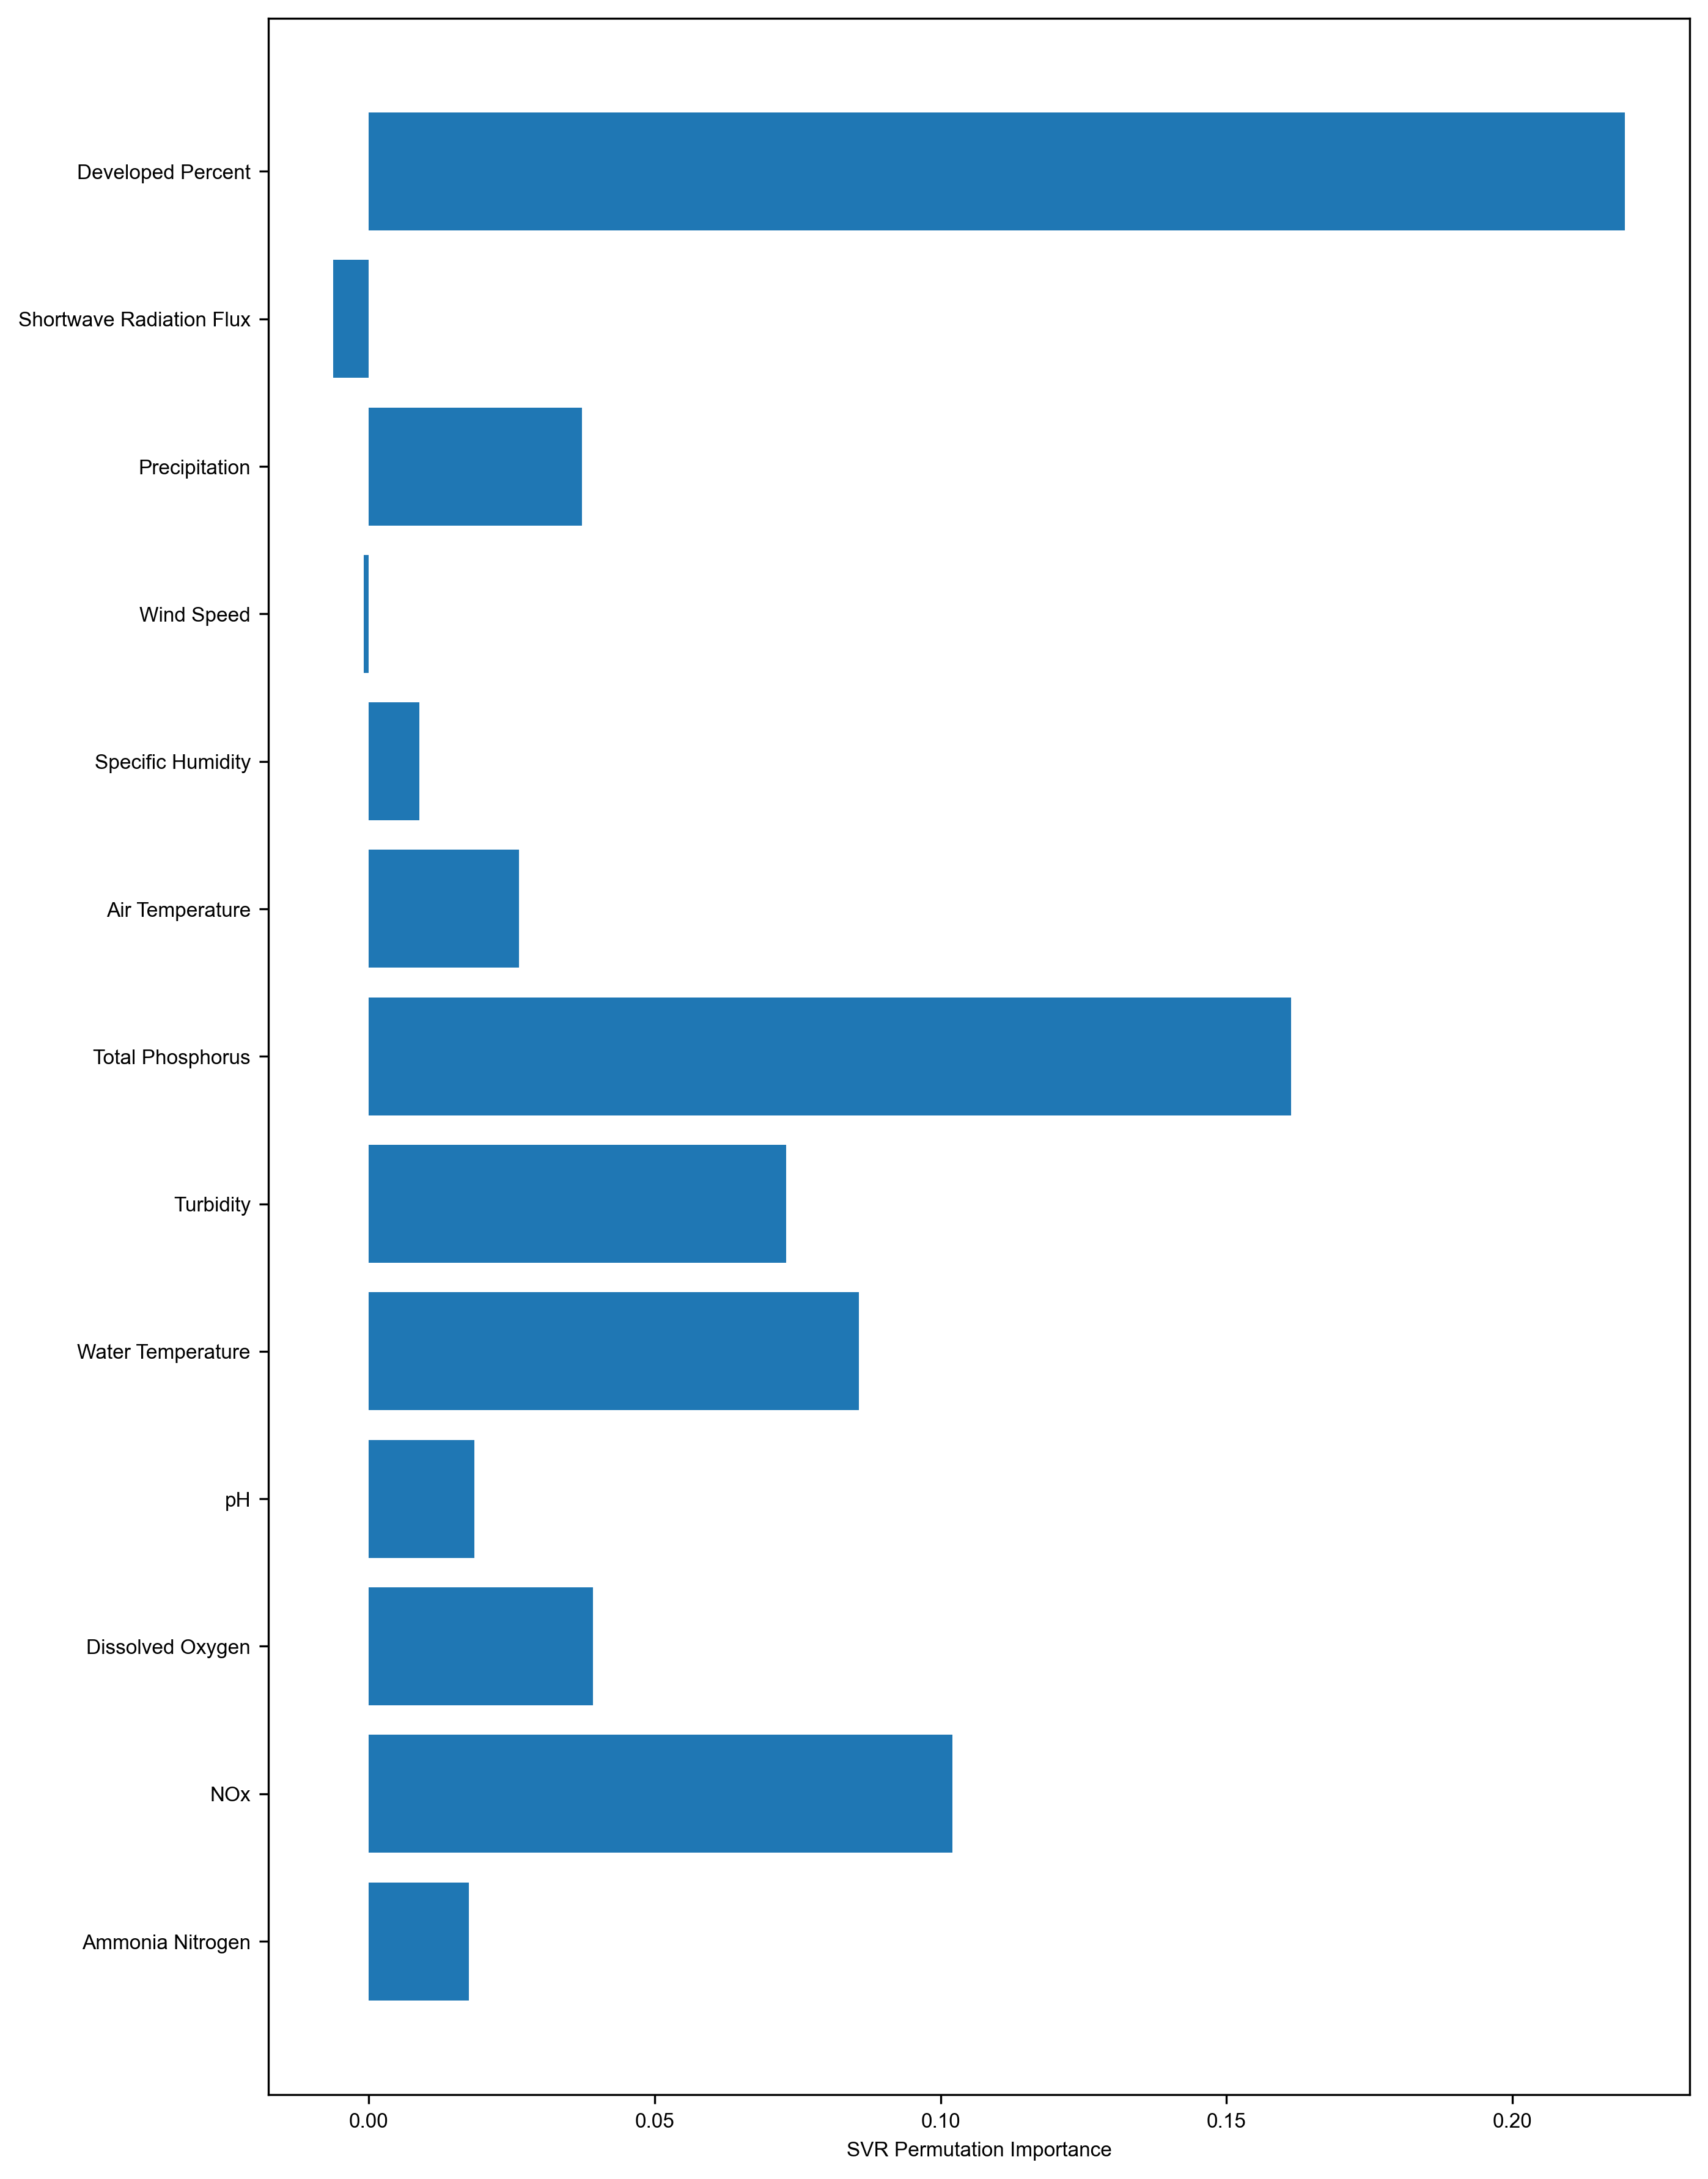

In [31]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(SV_R, Xtest, Ytest)
print(perm_importance.importances_mean)
# sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(dpi=300)
plt.barh(features, perm_importance.importances_mean)
plt.xlabel("SVR Permutation Importance")

In [32]:
m = pd.Series(y_predict_xtrain, index=Ytrain.index, name='Predicted Chlorophyll-a')

In [33]:
AllY_train = pd.concat([Ytrain,m],axis=1)
AllY_train

,Chl_current,Predicted Chlorophyll-a
0,2.540000,0.988311
1,3.759632,2.433543
2,2.860000,1.606617
3,3.692863,2.822208
4,5.130000,2.103279
...,...,...
2731,1.400000,0.595978
2732,0.860000,0.684313
2733,0.460000,0.460430
2734,0.540000,0.530232


In [34]:
n = pd.Series(y_predict_xtest, index=Ytest.index, name='Predicted Chlorophyll-a')

In [35]:
AllY_test = pd.concat([Ytest,n],axis=1)
AllY_test

,Chl_current,Predicted Chlorophyll-a
2736,3.080000,3.021242
2737,6.830000,2.134893
2738,4.349878,2.611449
2739,2.740000,1.225278
2740,2.210000,1.678213
...,...,...
3451,0.600000,0.458380
3452,0.480000,0.509764
3453,0.630000,0.452801
3454,0.930000,-0.209195


In [36]:
All_Y = pd.concat([AllY_train,AllY_test],ignore_index = True)
All_Y_sorted = All_Y.sort_index()
All_Y_sorted

,Chl_current,Predicted Chlorophyll-a
0,2.540000,0.988311
1,3.759632,2.433543
2,2.860000,1.606617
3,3.692863,2.822208
4,5.130000,2.103279
...,...,...
3451,0.600000,0.458380
3452,0.480000,0.509764
3453,0.630000,0.452801
3454,0.930000,-0.209195


In [37]:
All_Y.loc[0]

Chl_current                2.540000
Predicted Chlorophyll-a    0.988311
Name: 0, dtype: float64

In [38]:
All_Y_sorted.to_excel (r'C:/Users/yanzh/OneDrive - Florida State Students/桌面/export_dataframe.xlsx', index = False, header=True)

In [39]:
import os
import joblib
joblib.dump(SV_R, "./SVR_wolag.joblib")

['./SVR_wolag.joblib']

In [40]:
import os
import joblib
loaded_svr = joblib.load("./SVR_wolag.joblib")

In [41]:
# needs to robu trans
aaaa = loaded_svr.predict(np.log(x))

In [42]:
aaaa

array([ 0.98831122,  2.43354324,  1.60661699, ...,  0.45280136,
       -0.20919504, -0.32308933])

In [43]:
len(aaaa)

3456